# Finding the best markets to advertise in

The premise of this exercise is that we are trying to determine the best two markets to advertise in for an e-learning company that mostly offers courses on web and mobile development. To do this we will use the 2017 new coders survey data from freeCodeCamp, made publicly available here: https://github.com/freeCodeCamp/2017-new-coder-survey.

## 1. Read in and look at the data

In [71]:
import pandas as pd
pd.options.display.max_columns = 150 # to avoid truncated output 

survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [73]:
survey.describe(include='all')

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,949,1073.000000,2314.000000,15354,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,570,133.0,132.0,544.0,547.0,481.0,1753.0,9246,15382,15336,8116,1078,14345,835,7200.000000,3833.000000,4508.000000,15454,55,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,18175,15743,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,8138,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,266,939.0,584.0,1691.0,13483,6503.000000,6992,8118,15344,15335,16577.000000,17084.000000,18175,18175,18175,15743,15743,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,850,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,1024,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,15368,8727,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,1214,201.0,2960.0
unique,NaN,NaN,NaN,NaN,141,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,6,181,172,14,724,10,383,NaN,NaN,NaN,5,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18175,15743,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,NaN,NaN,NaN,7,NaN,3213,3,167,5,NaN,NaN,17738,18054,18065,15657,15654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,NaN
top,NaN,NaN,NaN,NaN,General Assembly,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,Marketing,Employ

In [74]:
survey.shape

(18175, 136)

freeCodeCamp's survey dataset consists of 18,175 participant surveys for 136 variables that describe the participants, their bootcamp experience, and whether they watched various youtube videos.

## 2. Determine if sample data is representative

In [75]:
# take a look at the jobs the survey participants said they would be interested
# in, note that we are primarily interested in mobile and web development 

job_pcts = survey["JobRoleInterest"].value_counts(normalize=True,dropna=False)*100
job_pcts

NaN                                                                                                                                                                                                                                                                         61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                     4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                    2.475928
  Data Scientist                                                                                                                                                      

In [76]:
# total number of different job options
print(len(job_pcts))

3214


Wow, it looks like there are 3,213 different possibilities for the job categories that a person could be interested in! However, the job categories seem to be a subset of some list of jobs (of which the survey participant could select). In addition, it looks like this survey question is left blank about 61.5% of the time.

To get a better idea of the proportion of people who are interested in web or mobile development, we can subset to the job categories that contain the words "Web" or "Mobile":

In [77]:
# focus just on web and mobile development
import numpy as np
job_pcts_noNA = survey["JobRoleInterest"].value_counts(normalize=True)*100
web_mobile_idxs = [("WEB" in job.upper()) | ("MOBILE" in job.upper()) for job in job_pcts_noNA.index]
job_pcts_noNA[web_mobile_idxs]

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
Back-End Web Developer                                                                                                                                                                                                                                                       2.030892
  Mobile Developer                                                                                                                                                    

In [78]:
sum(job_pcts_noNA[web_mobile_idxs])

86.31292906178975

It looks like when this survey question is filled out, 86.3% of the time the participant is interested in either web or mobile development. Hence if we drop the surveys where the participants did not fill in this information, then the data is fairly representative of the population that we'd be hoping to advertise our e-learning service to (which includes courses mostly in web and mobile development).

Below we make a bar plot which sumarizes these results.

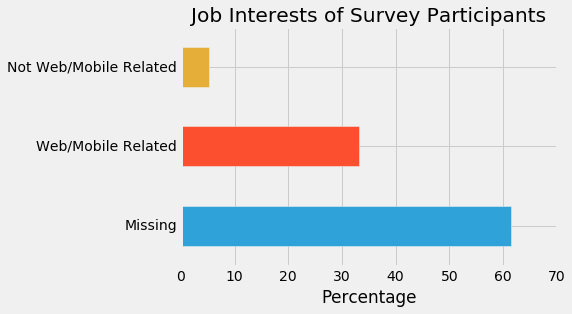

In [79]:
% matplotlib inline

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

pcts = [0,0,0]
pcts[0] = job_pcts[0]
pcts[1] = sum(job_pcts_noNA[web_mobile_idxs])*(1-job_pcts[0]/100)
pcts[2] = 100 - pcts[0] - pcts[1]
percentages = pd.Series(pcts,index=["Missing","Web/Mobile Related","Not Web/Mobile Related"])
percentages.plot.barh()
plt.xlabel("Percentage")
plt.title("Job Interests of Survey Participants")

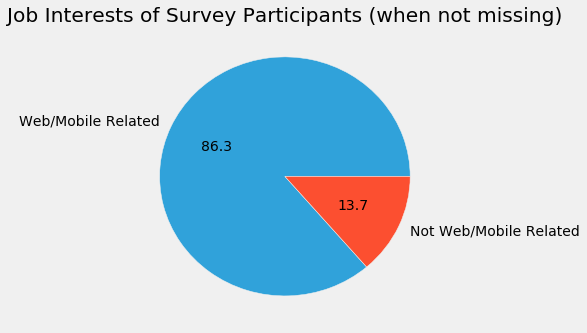

In [80]:
percentages[1:].plot.pie(figsize=(5,5),autopct='%.1f')
plt.ylabel('')
plt.title("Job Interests of Survey Participants (when not missing)")

## 3. Find where people are located so we can determine the two countries with the largest markets to advertise in

In [81]:
# remove the surveys in which the job interest question was not answered
print(survey.shape)
survey_job = survey[survey["JobRoleInterest"].isna()==False]
print(survey_job.shape)

(18175, 136)
(6992, 136)


In [82]:
# generate frequency tables for the CountryLive variable
# absolute frequencies
survey_job["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [83]:
# relative frequencies
survey_job["CountryLive"].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

Based on these results, the two largest markets are the United States and India. Together these would cover 53.4% of the sample participants. However, we note that some other countries like the United Kingdom and Canada, also have a sizable fraction of people interested in learning Web/Mobile development. We need to take this one step further and determine if the people in these countries are actually willing to spend money on their learning as well.

## 4. Determine willingness to pay for learning

We will use the `MoneyForLearning` column which describes the amount of money spent by participants since they started coding (in American dollars) and the `MonthsProgramming` column to determine payments made by users each month.

We will also restrict our further analyses to the United States, India, the United Kingdom, and Canada since they have the largest markets and English is an official language in all of these countries (and our e-learning courses are written in English).

In [84]:
# we will use the MoneyForLearning column which describes the amount of money
# spent by participants since they started coding (in American dollars)

country_idxs = survey_job["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"])

survey_sub = survey_job[country_idxs]

# check results
survey_sub["CountryLive"].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [85]:
# calculate monthly payment amounts

print(survey_sub["MonthsProgramming"].value_counts().sort_index().head())
# replace zero months with one month

survey_sub["CleanMonths"] = survey_sub["MonthsProgramming"].replace(0.0,1.0)
survey_sub["MoneyPerMonth"] = (survey_sub["MoneyForLearning"] / 
                               survey_sub["CleanMonths"])

0.0    150
1.0    480
2.0    401
3.0    380
4.0    209
Name: MonthsProgramming, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
# check for missing values
print(sum(survey_sub["MoneyPerMonth"].isna()))

# drop missing values
print(survey_sub.shape)
survey_sub = survey_sub[survey_sub["MoneyPerMonth"].isna() == False]
print(survey_sub.shape)

313
(4228, 138)
(3915, 138)


In [87]:
# get average monthly payments in the four countries of interest
survey_sub[["MoneyPerMonth","CountryLive"]].groupby(["CountryLive"]).mean()

,MoneyPerMonth
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


In [88]:
# take a look at the median as well
survey_sub[["MoneyPerMonth","CountryLive"]].groupby(["CountryLive"]).median()

,MoneyPerMonth
CountryLive,
Canada,0.000000
India,0.000000
United Kingdom,0.000000
United States of America,3.333333


In [89]:
# and the mode
from statistics import mode
survey_sub[["MoneyPerMonth","CountryLive"]].groupby(["CountryLive"]).agg(lambda x:
                                                                        x.mode()[0])

,MoneyPerMonth
CountryLive,
Canada,0.0
India,0.0
United Kingdom,0.0
United States of America,0.0


It looks like the average monthly payment is driven mostly by outliers given that the means and modes for each country are zero. The presence of outliers could also explain why the average monthly payments in the United Kingdom and Canada are much lower than the average monthly payments from India (which is the opposite of what I would expect based on socio-ecomonics).

We should look into this a bit more. Let's look at box plots of money per month for each of the four countries.

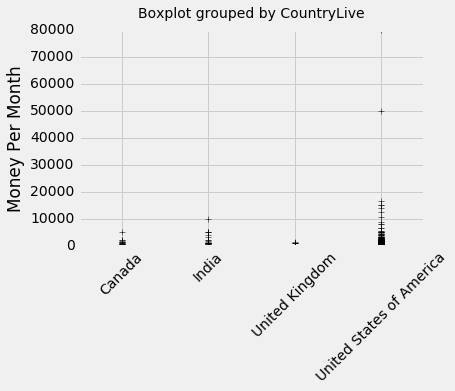

In [90]:
survey_sub[["MoneyPerMonth","CountryLive"]].boxplot(by="CountryLive",
                                                    rot=45)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.title('')

(0, 200)

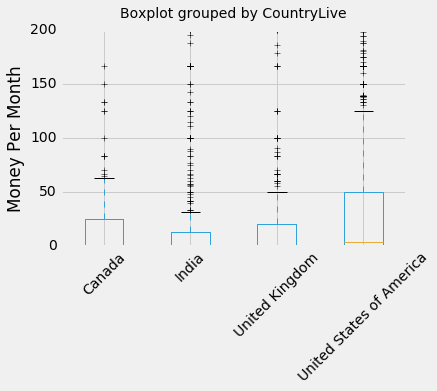

In [91]:
# zoom in to see the boxes!
survey_sub[["MoneyPerMonth","CountryLive"]].boxplot(by="CountryLive",
                                                    rot=45)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.title('')
plt.ylim(0,200)

There are many extreme outliers for each country!

In [92]:
print(survey_sub[["MoneyPerMonth","CountryLive"]].sort_values(
                                            by="MoneyPerMonth",
                                            ascending=False))

       MoneyPerMonth               CountryLive
14024   80000.000000  United States of America
2478    50000.000000  United States of America
16650   16666.666667  United States of America
17231   15000.000000  United States of America
6805    15000.000000  United States of America
7198    14000.000000  United States of America
16997   12500.000000  United States of America
3930    10833.333333  United States of America
13398   10000.000000                     India
3184     9000.000000  United States of America
9778     8000.000000  United States of America
718      8000.000000  United States of America
7505     6666.666667  United States of America
1222     6500.000000  United States of America
3145     5666.666667  United States of America
13145    5333.333333  United States of America
7989     5000.000000                     India
8202     5000.000000  United States of America
8901     5000.000000  United States of America
5769     5000.000000  United States of America
1728     5000

Let's investigate the participants who reported spending at least $10,000:

In [93]:
survey_sub[survey_sub["MoneyPerMonth"]>=10000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,CleanMonths,MoneyPerMonth
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,trans,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,b84e33311d235660ad1b7a918d7d7df4,b3229f43317af29a4d23734f9d543222,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,English,"single, never married",100000.0,2.0,befcbda814,2017-03-10 23:30:16,2017-03-10 23:26:33,2017-03-10 23:31:50,2017-03-10 23:30:19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,48000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,50000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,50.0,e1d790033545934fbe5bb5b60e368cd9,7cf1e41682462c42ce48029abf77d43c,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,"DevOps / SysAdmin, Front-End Web Developer...",no preference,English,married or domestic partnership,65000.0,6.0,75759e5a1c,2017-03-13 10:06:46,2017-03-13 09:56:13,2017-03-13 10:10:00,2017-03-13 10:06:50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,reactivex.io/learnrx/ & j

Some of these participants attended bootcamps which might be expensive. This is a legitimate expense, but if we're interested in average long-term monthly payments, we should probably remove the people who were programming for < 3 months.

In [133]:
# get average monthly payments in the four countries of interest
avg_pmt_gt3mo = survey_sub[survey_sub["MonthsProgramming"]>3][["MoneyPerMonth","CountryLive"]].groupby(["CountryLive"]).mean()
avg_pmt_gt3mo

,MoneyPerMonth
CountryLive,
Canada,102.823423
India,79.633596
United Kingdom,45.850150
United States of America,161.152724


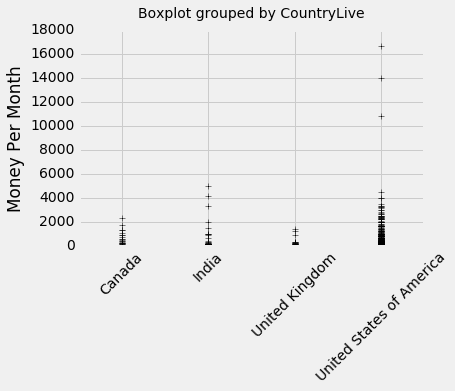

In [96]:
survey_sub[survey_sub["MonthsProgramming"]>3][["MoneyPerMonth","CountryLive"]].boxplot(by="CountryLive",
                                                    rot=45)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.title('')

(0, 200)

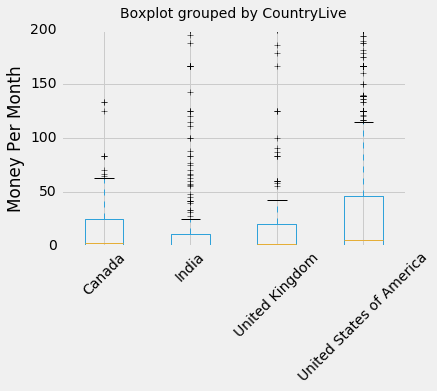

In [97]:
# zoom in to see the boxes!
survey_sub[survey_sub["MonthsProgramming"]>3][["MoneyPerMonth","CountryLive"]].boxplot(by="CountryLive",
                                                    rot=45)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.title('')
plt.ylim(0,200)

Restricting to those enrolled for more than 3 months removes some of the more extreme outliers (though there are still some outliers that are quite high). It's certainly possible that the survey question was interpreted incorrectly.  In this case, we can also try removing outliers using a statistical methodology.

In [110]:
# remove all participants that had PaymentPerMonth > Q3+1.5*IQR
quantiles = survey_sub[survey_sub["CountryLive"]=="Canada"]["MoneyPerMonth"].quantile([0.25,0.75])
Canada_limit = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])

quantiles = survey_sub[survey_sub["CountryLive"]=="India"]["MoneyPerMonth"].quantile([0.25,0.75])
India_limit = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])

quantiles = survey_sub[survey_sub["CountryLive"]=="United Kingdom"]["MoneyPerMonth"].quantile([0.25,0.75])
UK_limit = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])

quantiles = survey_sub[survey_sub["CountryLive"]=="United States of America"]["MoneyPerMonth"].quantile([0.25,0.75])
US_limit = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])

In [114]:
survey_sub_outl = survey_sub[(((survey_sub["CountryLive"]=="Canada") & 
                             (survey_sub["MoneyPerMonth"] <= Canada_limit)) |
                            ((survey_sub["CountryLive"]=="India") & 
                             (survey_sub["MoneyPerMonth"] <= India_limit)) |
                            ((survey_sub["CountryLive"]=="United Kingdom") & 
                             (survey_sub["MoneyPerMonth"] <= UK_limit)) |
                            ((survey_sub["CountryLive"]=="United States of America") & 
                             (survey_sub["MoneyPerMonth"] <= US_limit)) )]

In [130]:
# get average monthly payments in the four countries of interest
outl_avg_pmt = survey_sub_outl[["MoneyPerMonth","CountryLive"]].groupby(["CountryLive"]).mean()
outl_avg_pmt

,MoneyPerMonth
CountryLive,
Canada,6.826765
India,2.530940
United Kingdom,6.096647
United States of America,14.428544


Wow, the mean values for `MoneyPerMonth` are really driven by outliers! Let's take a look at the total estimated amount of earnings using the two outlier removal methods:

In [134]:
# Method I: restrict to months > 3

# number of participants:
counts = survey_sub[survey_sub["MonthsProgramming"]>3]["CountryLive"].value_counts()
print(counts)

# Canada
print(avg_pmt_gt3mo.iloc[0] * counts["Canada"])

# India
print(avg_pmt_gt3mo.iloc[1] * counts["India"])

# UK
print(avg_pmt_gt3mo.iloc[2] * counts["United Kingdom"])

# US
print(avg_pmt_gt3mo.iloc[3] * counts["United States of America"])

United States of America    1880
India                        335
United Kingdom               175
Canada                       155
Name: CountryLive, dtype: int64
MoneyPerMonth    15937.630637
Name: Canada, dtype: float64
MoneyPerMonth    26677.254651
Name: India, dtype: float64
MoneyPerMonth    8023.776305
Name: United Kingdom, dtype: float64
MoneyPerMonth    302967.121808
Name: United States of America, dtype: float64


In [129]:
# Method II: remove statistical outliers
counts = survey_sub_outl["CountryLive"].value_counts()
print(counts)

# Canada
print(outl_avg_pmt.iloc[0] * counts["Canada"])

# India
print(outl_avg_pmt.iloc[1] * counts["India"])

# UK
print(outl_avg_pmt.iloc[2] * counts["United Kingdom"])

# US
print(outl_avg_pmt.iloc[3] * counts["United States of America"])

United States of America    2485
India                        371
United Kingdom               234
Canada                       202
Name: CountryLive, dtype: int64
MoneyPerMonth    1379.006539
Name: Canada, dtype: float64
MoneyPerMonth    938.978677
Name: India, dtype: float64
MoneyPerMonth    1426.615383
Name: United Kingdom, dtype: float64
MoneyPerMonth    35854.930911
Name: United States of America, dtype: float64


## Conclusions

* Method I indicates that advertisting would be best in the US, followed by India, Canada, and then the UK.
* Method II indicates that advertising would be best in the US, followed by the UK, then Canada, then India.
* Since the expected returns from the US are more than an order or magnitude larger than the returns from the other countries, the best approaches might be to:
    * only advertise in the US, or
    * spend most of the money (>= 90%) on advertising in the US and split the rest between the UK, India, and Canada.